In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_dir = 'electrocardiogram-skin-conductance-and-respiration-from-spider-fearful-individuals-watching-spider-video-clips-1.0.0'

In [3]:
exaple_dir = os.path.join(base_dir, 'VP05/')

In [4]:
ecg_data_dir = os.path.join(exaple_dir, 'BitalinoECG.txt')
br_data_dir = os.path.join(exaple_dir, 'BitalinoBR.txt')

In [5]:
ecg_data = np.loadtxt(ecg_data_dir, delimiter='\t', skiprows=1, dtype=str)
print(ecg_data)

[['-0.0263671875' '111453.135' 'Raw']
 ['-0.0205078125' '111453.141' 'Raw']
 ['-0.0234375' '111453.148' 'Raw']
 ...
 ['-0.01171875' '115334.183' 'Raw']
 ['-0.0087890625' '115334.207' 'Raw']
 ['-0.0205078125' '115334.211' 'Raw']]


In [6]:
ecg_data.shape

(232110, 3)

In [7]:
ecg_data = np.delete(ecg_data, 2, 1)

In [8]:
ecg_data

array([['-0.0263671875', '111453.135'],
       ['-0.0205078125', '111453.141'],
       ['-0.0234375', '111453.148'],
       ...,
       ['-0.01171875', '115334.183'],
       ['-0.0087890625', '115334.207'],
       ['-0.0205078125', '115334.211']], dtype='<U13')

In [9]:
ecg_data[:,1]

array(['111453.135', '111453.141', '111453.148', ..., '115334.183',
       '115334.207', '115334.211'], dtype='<U13')

In [10]:
ecg_data = ecg_data.astype(np.float32)

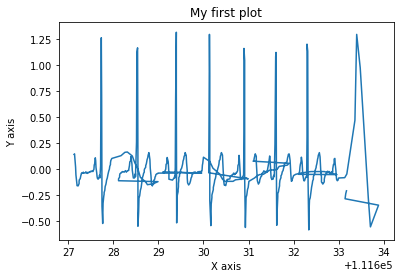

In [11]:
plt.title('My first plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.plot(ecg_data[9400:10000, 1], ecg_data[9400:10000, 0])
plt.show()

In [12]:
import pandas as pd

In [13]:
dataset = pd.DataFrame({'Time': ecg_data[:, 1], 'Amp': ecg_data[:, 0]})

In [14]:
dataset = dataset.sort_values(by=['Time'])

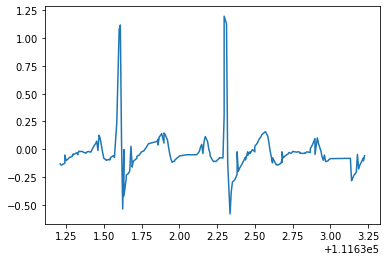

In [16]:
plt.plot(dataset['Time'][9800:10000], dataset['Amp'][9800:10000])

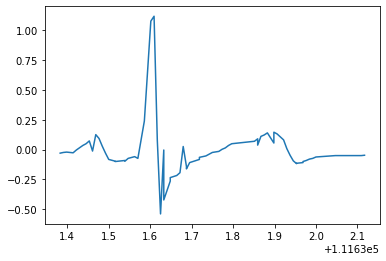

In [20]:
plt.plot(dataset['Time'][9820:9890], dataset['Amp'][9820:9890])

In [21]:
import neurokit2 as nk

In [22]:
rpeaks, info = nk.ecg_peaks(ecg_data[7000:10000,0], sampling_rate=100)

In [23]:
rpeaks

,ECG_R_Peaks
0,0
1,0
2,0
3,0
4,0
...,...
2995,0
2996,0
2997,0
2998,0


In [24]:
info

{'ECG_R_Peaks': array([ 105,  190,  275,  361,  446,  527,  601,  672,  743,  816,  903,
         992, 1080, 1164, 1245, 1321, 1399, 1478, 1553, 1626, 1702, 1785,
        1880, 1967, 2041, 2115, 2190, 2281, 2374, 2460, 2540, 2620, 2700,
        2775, 2847, 2917, 2991])}

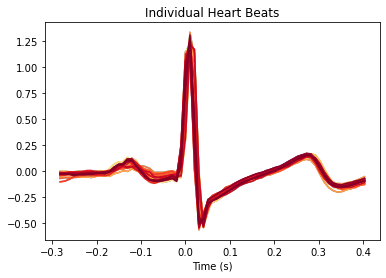

In [50]:
seg = nk.ecg_segment(ecg_data[0:3000,0], sampling_rate=100, show=True)

In [51]:
seg

{'1':              Signal  Index Label
 -0.282106 -0.020508     85     1
 -0.272030 -0.017578     86     1
 -0.261955 -0.017578     87     1
 -0.251880 -0.014648     88     1
 -0.241805 -0.005859     89     1
 ...             ...    ...   ...
  0.362707 -0.155273    149     1
  0.372782 -0.134766    150     1
  0.382858 -0.123047    151     1
  0.392933 -0.108398    152     1
  0.403008 -0.096680    153     1
 
 [69 rows x 3 columns],
 '2':              Signal  Index Label
 -0.282106 -0.023438    173     2
 -0.272030 -0.020508    174     2
 -0.261955 -0.023438    175     2
 -0.251880 -0.023438    176     2
 -0.241805 -0.023438    177     2
 ...             ...    ...   ...
  0.362707 -0.161133    237     2
  0.372782 -0.152344    238     2
  0.382858 -0.131836    239     2
  0.392933 -0.123047    240     2
  0.403008 -0.105469    241     2
 
 [69 rows x 3 columns],
 '3':              Signal  Index Label
 -0.282106 -0.023438    264     3
 -0.272030 -0.020508    265     3
 -0.261955 -0.0

In [52]:
seg['1']['Signal'].to_numpy()

array([-0.02050781, -0.01757812, -0.01757812, -0.01464844, -0.00585938,
       -0.01171875, -0.01171875, -0.01171875, -0.00292969, -0.00878906,
       -0.00878906,  0.        ,  0.04101562,  0.05859375,  0.07617188,
        0.1171875 ,  0.08496094,  0.03222656, -0.01757812, -0.05859375,
       -0.09667969, -0.09667969, -0.09375   , -0.09375   , -0.07324219,
       -0.06445312, -0.07617188,  0.23730469,  1.14550781,  1.22753906,
        0.09082031, -0.55371094, -0.41015625, -0.31054688, -0.28417969,
       -0.26074219, -0.24316406, -0.21386719, -0.16992188, -0.14648438,
       -0.12597656, -0.10546875, -0.08203125, -0.0703125 , -0.046875  ,
       -0.02929688, -0.01171875, -0.00292969,  0.01757812,  0.02636719,
        0.05273438,  0.07617188,  0.10253906,  0.12597656,  0.14648438,
        0.1640625 ,  0.15234375,  0.10546875,  0.01464844, -0.05273438,
       -0.11425781, -0.15527344, -0.16699219, -0.1640625 , -0.15527344,
       -0.13476562, -0.12304688, -0.10839844, -0.09667969])

In [54]:
X_matrix = []

In [55]:
for peak in seg:
    vector = seg[peak]['Signal'].to_numpy()
    X_matrix.append(vector)
print(X_matrix)

[array([-0.02050781, -0.01757812, -0.01757812, -0.01464844, -0.00585938,
       -0.01171875, -0.01171875, -0.01171875, -0.00292969, -0.00878906,
       -0.00878906,  0.        ,  0.04101562,  0.05859375,  0.07617188,
        0.1171875 ,  0.08496094,  0.03222656, -0.01757812, -0.05859375,
       -0.09667969, -0.09667969, -0.09375   , -0.09375   , -0.07324219,
       -0.06445312, -0.07617188,  0.23730469,  1.14550781,  1.22753906,
        0.09082031, -0.55371094, -0.41015625, -0.31054688, -0.28417969,
       -0.26074219, -0.24316406, -0.21386719, -0.16992188, -0.14648438,
       -0.12597656, -0.10546875, -0.08203125, -0.0703125 , -0.046875  ,
       -0.02929688, -0.01171875, -0.00292969,  0.01757812,  0.02636719,
        0.05273438,  0.07617188,  0.10253906,  0.12597656,  0.14648438,
        0.1640625 ,  0.15234375,  0.10546875,  0.01464844, -0.05273438,
       -0.11425781, -0.15527344, -0.16699219, -0.1640625 , -0.15527344,
       -0.13476562, -0.12304688, -0.10839844, -0.09667969]), ar

In [56]:
X_matrix = np.array(X_matrix)

In [57]:
X_matrix.shape

(36, 69)

In [59]:
from sklearn.decomposition import PCA
pca_ = PCA(n_components=36)
pca_.fit(X_matrix)
print(pca_.explained_variance_ratio_)


[9.06797510e-01 2.91283072e-02 2.44473213e-02 1.44073925e-02
 7.33229266e-03 4.64414099e-03 3.59814643e-03 1.67123104e-03
 1.57922468e-03 9.44528371e-04 7.92114902e-04 6.20144740e-04
 5.84891313e-04 4.89549948e-04 4.64708717e-04 4.20411512e-04
 3.31793394e-04 2.37781734e-04 2.02574127e-04 1.80775582e-04
 1.59818840e-04 1.49365981e-04 1.23777011e-04 1.07533092e-04
 1.01278413e-04 8.69032511e-05 7.47318730e-05 6.00928542e-05
 5.78426539e-05 5.58586516e-05 3.88124253e-05 3.42937968e-05
 2.78757670e-05 2.64536154e-05 2.05204046e-05 8.82642758e-33]


In [61]:
X = pca_.transform(X_matrix)

In [79]:
X.shape

(36, 36)

In [85]:
pca_.components_.shape

(36, 69)

In [ ]:
from scipy.signal import resample

retransformed_signal = [resample(i,j) for i,j in 
        zip(pca_.inverse_transform(X),r2r_dist)]
restitched_signal = np.concatenate(retransformed_templates)

In [112]:
loadings = pd.DataFrame(pca_.components_.T)

In [113]:
loadings

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.008505,0.074327,0.017072,0.154168,-0.167832,-0.227582,-0.050436,0.000457,0.270551,-0.019607,...,0.136838,0.025813,0.014724,0.140864,-0.039304,-0.131031,-0.110211,-0.022950,-0.137785,0.310098
1,-0.003611,0.063781,0.016027,0.160456,-0.185017,-0.209266,-0.054966,0.060114,0.201105,-0.122293,...,-0.177863,-0.095131,0.061667,-0.026642,0.081032,0.095432,-0.014227,0.033035,0.020373,-0.138800
2,-0.002575,0.058553,0.025372,0.131397,-0.171277,-0.142535,-0.103454,-0.037578,0.147189,-0.098862,...,-0.042933,-0.014106,0.099530,-0.133919,0.127774,0.064506,0.177586,0.000841,0.027838,-0.175916
3,0.000022,0.034312,0.025409,0.111391,-0.156196,-0.140085,-0.152804,-0.098979,0.015861,-0.122831,...,-0.240938,0.235338,-0.084675,0.097813,-0.120356,0.177058,-0.223554,-0.188196,-0.089973,0.139330
4,-0.000696,0.000800,0.017262,0.107132,-0.204584,-0.091085,-0.128026,-0.025034,0.091299,-0.130712,...,0.095144,0.044037,-0.112492,-0.114423,-0.268377,-0.138259,0.081928,0.033797,0.229457,-0.039217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,-0.000929,0.009040,0.065106,-0.187649,-0.013057,-0.082245,-0.169413,-0.131341,-0.177651,0.110794,...,0.104355,-0.147511,0.196608,0.090861,-0.273789,0.157122,0.177397,0.065664,0.014198,-0.123259
65,-0.003222,0.011792,0.053294,-0.184433,-0.011265,-0.075895,-0.156028,-0.147070,-0.137738,-0.022732,...,-0.092763,-0.169094,-0.066192,-0.397402,-0.100253,-0.196288,0.060237,-0.012104,-0.311886,0.068223
66,-0.005440,0.027445,0.050498,-0.179960,-0.011450,-0.027657,-0.154006,-0.265080,-0.157729,-0.008916,...,-0.049249,0.144368,0.083941,0.201881,0.042347,-0.079312,0.001750,0.058527,0.066028,-0.002643
67,-0.005061,0.016263,0.042006,-0.182065,-0.008169,-0.051592,-0.140668,-0.271757,-0.087541,-0.091442,...,0.139080,0.121432,-0.272098,0.009213,0.045524,-0.012682,0.137239,0.048324,0.022176,0.095034


In [131]:
arr = loadings[0].to_numpy()

In [132]:
arr.shape

(69,)

In [133]:
arr = arr.reshape(69,1)

In [126]:
new3 = ecg_data[0:3000,0]

In [130]:
new3 = new3.reshape(-1,1)

In [134]:
new3 = np.matmul(new3, arr.T)

In [119]:
new = np.matmul(X_matrix, arr)

In [123]:
new2 = X_matrix.dot(arr)

In [141]:
new3 = new3.T

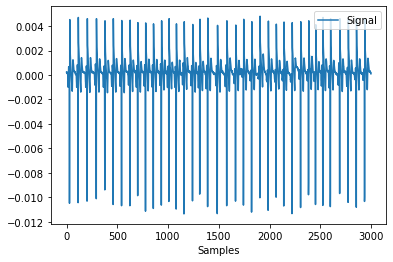

In [142]:
nk.signal_plot(new3[0])

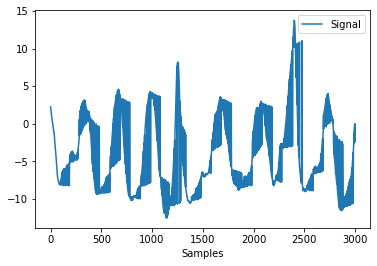

In [144]:
br_data = np.loadtxt(br_data_dir, delimiter='\t', skiprows=1, dtype=str)
br_data = np.delete(br_data, 2, 1)
br_data = br_data.astype(np.float64)
br_dataset = pd.DataFrame({'Time': br_data[:, 1], 'Amp': br_data[:, 0]})
br_dataset = br_dataset.sort_values(by=['Time'])
br_arr2 = br_dataset['Amp'][0:3000].to_numpy()
nk.signal_plot(br_arr2)

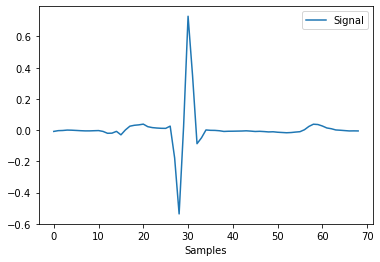

In [111]:
nk.signal_plot(loadings[0])

In [80]:
pca_src = np.dot(pca_.components_.T, X.T).T

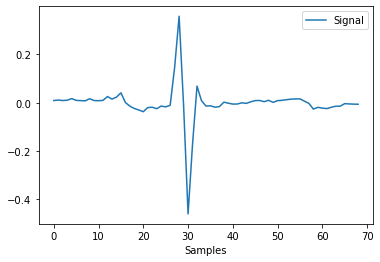

In [84]:
nk.signal_plot(pca_src[0])

In [78]:
np.std(pca_.components_[:,0])

0.14014572874383974

In [87]:
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=100, desired_length=len(ecg_data[7000:10000,0]))

In [88]:
edr = nk.ecg_rsp(ecg_rate, sampling_rate=100)

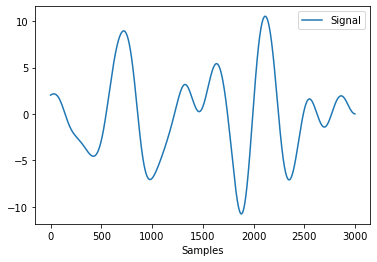

In [89]:
nk.signal_plot(edr)

In [90]:
br_data = np.loadtxt(br_data_dir, delimiter='\t', skiprows=1, dtype=str)
br_data = np.delete(br_data, 2, 1)
br_data = br_data.astype(np.float64)
br_dataset = pd.DataFrame({'Time': br_data[:, 1], 'Amp': br_data[:, 0]})
br_dataset = br_dataset.sort_values(by=['Time'])
br_arr = br_dataset['Amp'][7000:10000].to_numpy()



In [93]:
br_data.shape

(232110, 2)

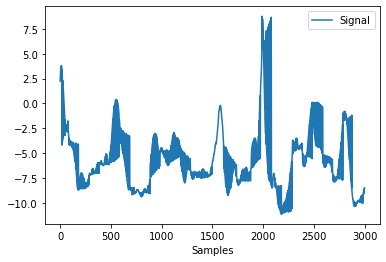

In [92]:
nk.signal_plot(br_arr)

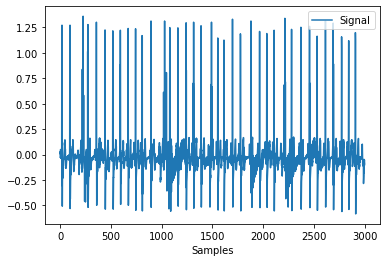

In [97]:
nk.signal_plot(dataset['Amp'][7000:10000].to_numpy())

In [ ]:
import wfdb
import numpy as np
## Record path.
record = base_dir + "mitdb/100"
## Collect 1 Minute of signal and annotation data from the record.
mins_of_data = 1
## Full signal and annotations
signal, fields = wfdb.rdsamp(record)
## Heartbeat locations
ann = wfdb.rdann( record, 'atr')[0] 
## Cut only first minute
sample_rate = fields['fs']
signal = signal[:mins_of_data*60*sample_rate,:]
ann = [i for i in ann if i<np.shape(signal)[0]]

In [ ]:
## Find R-R templates
r2r = [i for i in zip(ann[:-1],ann[1:])][1:]
r2r_dist = [j-i for i,j in r2r]
avg_dist = int(np.mean(r2r_dist) + 0.5)
## Resample the templates
from scipy.signal import resample
resampled_templates = [resample(signal[i:j,0],avg_dist) for i,j in r2r]

In [ ]:
## Apply PCA and transform
from sklearn.decomposition import PCA
pca_ = PCA(n_components=1)
transformed_resampled_templates = pca_.fit_transform(resampled_templates)
## Retransform the templates and restitch
retransformed_templates = [resample(i,j) for i,j in 
        zip(pca_.inverse_transform(transformed_resampled_templates),r2r_dist)]
restitched_signal = np.concatenate(retransformed_templates)